In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

In [13]:
boston = pd.read_csv("Boston.csv")
X = boston.drop('medv', axis=1)
y = boston[['medv']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
scl_x , scl_y = MinMaxScaler(), MinMaxScaler()
X_trn_scl, y_trn_scl = scl_x.fit_transform(X_train), scl_y.fit_transform(y_train)
X_tst_scl, y_tst_scl = scl_x.transform(X_test), scl_y.transform(y_test)

Single Layer Perceptron

In [14]:
intializer = tf.keras.initializers.GlorotUniform(seed = 25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(1, 
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               loss='mean_squared_error')
history = model.fit(X_trn_scl, y_trn_scl,validation_data=(X_tst_scl,y_tst_scl), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 0.2253 - val_loss: 0.0963
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0771 - val_loss: 0.0635
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0496 - val_loss: 0.0395
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0407 - val_loss: 0.0335
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.0400
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.0266
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.0453
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.0263
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - val_loss: 0.0205
Epoch 10/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.0189
Epoch 11/50
12/12 

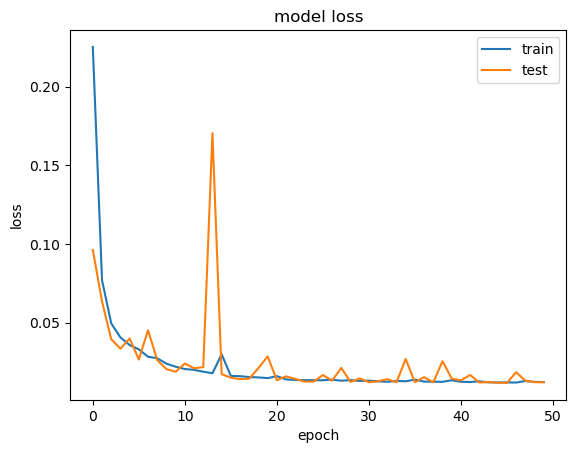

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
y_pred = scl_y.inverse_transform(model.predict(X_tst_scl))
r2_score( y_test, y_pred )

5/5 [==============================] - 0s 4ms/step


0.6718112230300903

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Multi-Layer Perceptron

In [18]:
intializer = tf.keras.initializers.GlorotUniform(seed = 25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(10, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(5, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, 
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               loss='mean_squared_error')
history = model.fit(X_trn_scl, y_trn_scl,validation_data=(X_tst_scl,y_tst_scl), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 23ms/step - loss: 0.0716 - val_loss: 0.0362
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0415 - val_loss: 0.0650
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.0237
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.0220
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.0656
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0180
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0304
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.0174
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0411
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.0147
Epoch 11/50
12/12 

In [19]:
y_pred = scl_y.inverse_transform(model.predict(X_tst_scl))
r2_score( y_test, y_pred )

5/5 [==============================] - 0s 2ms/step


0.71436607837677

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [21]:
intializer = tf.keras.initializers.GlorotUniform(seed = 25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(10, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(5, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, 
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               loss='mean_squared_error')
history = model.fit(X_trn_scl, y_trn_scl,validation_data=(X_tst_scl,y_tst_scl), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 0.1271 - val_loss: 0.0708
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0679 - val_loss: 0.0377
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0452 - val_loss: 0.0372
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.0373
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0445 - val_loss: 0.0374
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0477 - val_loss: 0.0373
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0472 - val_loss: 0.0372
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.0379
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0496 - val_loss: 0.0406
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0523 - val_loss: 0.0394
Epoch 11/50
12/12 

In [22]:
y_pred = scl_y.inverse_transform(model.predict(X_tst_scl))
r2_score( y_test, y_pred )

5/5 [==============================] - 0s 3ms/step


-0.0009056329727172852